# Data handling

*NB*: This notebook takes at its input CSV files from lendingclub, which should be saved in the relative path '../data/lendingclub/'. It also takes as an input a file with text data (analyst reports) called 'Clean_data_BNP PARIBAS GROUP.json', which we have uploaded on the Hub, and which should be saved in '../data/analysts/'

In [1]:
# load lending club data 2007-2011 and look at structure
import pandas as pd
df = pd.read_csv('../data/lendingclub/LoanStats3a.csv',skiprows=[0],low_memory=False)

In [2]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


### SELECT
Extract variables of interest from a table

In [3]:
# what types have we got?
clist = ['purpose','int_rate','loan_amnt', 'home_ownership']
df = df[clist]
df.head()

,purpose,int_rate,loan_amnt,home_ownership
0,credit_card,10.65%,5000.0,RENT
1,car,15.27%,2500.0,RENT
2,small_business,15.96%,2400.0,RENT
3,other,13.49%,10000.0,RENT
4,other,12.69%,3000.0,RENT


In [4]:
# inspect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 4 columns):
purpose           42535 non-null object
int_rate          42535 non-null object
loan_amnt         42535 non-null float64
home_ownership    42535 non-null object
dtypes: float64(1), object(3)
memory usage: 1.3+ MB


In [5]:
# clean up
df['int_rate'] = df['int_rate'].str.replace('%','').astype('float')
df['purpose'] = df['purpose'].astype('category')
df['home_ownership'] = df['home_ownership'].astype('category')
df.head()

,purpose,int_rate,loan_amnt,home_ownership
0,credit_card,10.65,5000.0,RENT
1,car,15.27,2500.0,RENT
2,small_business,15.96,2400.0,RENT
3,other,13.49,10000.0,RENT
4,other,12.69,3000.0,RENT


In [6]:
# inspect clean data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 4 columns):
purpose           42535 non-null category
int_rate          42535 non-null float64
loan_amnt         42535 non-null float64
home_ownership    42535 non-null category
dtypes: category(2), float64(2)
memory usage: 748.7 KB


### QUERY / FILTER

In [7]:
# one condition
df2 = df[df['purpose']=='credit_card']
df2.head()

,purpose,int_rate,loan_amnt,home_ownership
0,credit_card,10.65,5000.0,RENT
13,credit_card,9.91,3000.0,RENT
22,credit_card,11.71,10000.0,OWN
25,credit_card,9.91,15000.0,MORTGAGE
29,credit_card,11.71,8500.0,RENT


In [8]:
# two conditions: and 
df2 = df[(df['purpose']=='credit_card') & (df['int_rate']>= 10)]
df2.head()

,purpose,int_rate,loan_amnt,home_ownership
0,credit_card,10.65,5000.0,RENT
22,credit_card,11.71,10000.0,OWN
29,credit_card,11.71,8500.0,RENT
34,credit_card,15.96,7000.0,RENT
35,credit_card,10.65,12400.0,RENT


In [9]:
# two conditions: or
df2 = df[(df['purpose']=='credit_card') | (df['int_rate']>= 10)]
df2.head()

,purpose,int_rate,loan_amnt,home_ownership
0,credit_card,10.65,5000.0,RENT
1,car,15.27,2500.0,RENT
2,small_business,15.96,2400.0,RENT
3,other,13.49,10000.0,RENT
4,other,12.69,3000.0,RENT


In [10]:
# null checking
df2 = df[df['int_rate'].notna()]
df2.head()

,purpose,int_rate,loan_amnt,home_ownership
0,credit_card,10.65,5000.0,RENT
1,car,15.27,2500.0,RENT
2,small_business,15.96,2400.0,RENT
3,other,13.49,10000.0,RENT
4,other,12.69,3000.0,RENT


In [11]:
# null checking
df2 = df[df['int_rate'].isna()]
df2.head()

,purpose,int_rate,loan_amnt,home_ownership
39786,NaN,NaN,NaN,NaN
42536,NaN,NaN,NaN,NaN
42537,NaN,NaN,NaN,NaN


In [12]:
# get rid of missing data
df = df.dropna()

### DELETE

In [13]:
# want to delete rates below 15 percent
df2 = df[df['int_rate']>15]
df2.head()

,purpose,int_rate,loan_amnt,home_ownership
1,car,15.27,2500.0,RENT
2,small_business,15.96,2400.0,RENT
6,debt_consolidation,15.96,7000.0,RENT
7,car,18.64,3000.0,RENT
8,small_business,21.28,5600.0,OWN


### SELECT DISTINCT

In [14]:
# unique value
df['home_ownership'].unique()

[RENT, OWN, MORTGAGE, OTHER, NONE]
Categories (5, object): [RENT, OWN, MORTGAGE, OTHER, NONE]

In [15]:
# value counts 
df['home_ownership'].value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

### SORT

In [16]:
# sort on one variable
df2 = df.sort_values('int_rate',ascending=False)
df2.head()

,purpose,int_rate,loan_amnt,home_ownership
13525,other,24.59,25000.0,MORTGAGE
13531,renewable_energy,24.40,12000.0,RENT
5983,debt_consolidation,24.11,21250.0,RENT
1805,credit_card,24.11,25000.0,MORTGAGE
1623,credit_card,24.11,24250.0,MORTGAGE


In [17]:
# sort on two variables
df2 = df.sort_values(['int_rate','loan_amnt'],ascending=False)
df2.head()

,purpose,int_rate,loan_amnt,home_ownership
13525,other,24.59,25000.0,MORTGAGE
13531,renewable_energy,24.40,12000.0,RENT
1805,credit_card,24.11,25000.0,MORTGAGE
1623,credit_card,24.11,24250.0,MORTGAGE
5983,debt_consolidation,24.11,21250.0,RENT


In [18]:
# sort ascending
df2 = df.sort_values('int_rate',ascending=True)
df2.head()

,purpose,int_rate,loan_amnt,home_ownership
14646,debt_consolidation,5.42,7000.0,RENT
23453,home_improvement,5.42,10000.0,MORTGAGE
23442,debt_consolidation,5.42,11000.0,MORTGAGE
12879,major_purchase,5.42,1800.0,RENT
8561,car,5.42,2500.0,OWN


### MUTATE

In [19]:
# create a new column based on existing ones
df2 = df.assign(annual_int = (df['int_rate']*df['loan_amnt']/100))
df2.head()

,purpose,int_rate,loan_amnt,home_ownership,annual_int
0,credit_card,10.65,5000.0,RENT,532.50
1,car,15.27,2500.0,RENT,381.75
2,small_business,15.96,2400.0,RENT,383.04
3,other,13.49,10000.0,RENT,1349.00
4,other,12.69,3000.0,RENT,380.70


### AGGREGATE

In [20]:
# find key statistics
print(df['loan_amnt'].min())
print(df['loan_amnt'].max())
print(df['loan_amnt'].mean())
print(df['loan_amnt'].std())

500.0
35000.0
11089.72258140355
7410.938390546378


In [21]:
# quick way to get descriptives
df.describe()

,int_rate,loan_amnt
count,42535.000000,42535.000000
mean,12.165016,11089.722581
std,3.707936,7410.938391
min,5.420000,500.000000
25%,9.630000,5200.000000
50%,11.990000,9700.000000
75%,14.720000,15000.000000
max,24.590000,35000.000000


### GROUP BY

In [22]:
# create groupby object
df2 = df.groupby('purpose')

In [23]:
# aggregate
df2.agg(['std','mean'])

int_rate               loan_amnt              
                         std       mean          std          mean
purpose                                                           
car                 3.432473  10.651641  4106.910767   6760.325077
credit_card         3.546077  11.842494  6968.248970  11614.935183
debt_consolidation  3.708183  12.606085  7437.054345  12559.509001
educational         2.734871  12.121540  5095.382148   6626.540284
home_improvement    3.789554  11.596121  8002.819433  11394.107534
house               3.911989  12.411408  8241.622866  12583.626761
major_purchase      3.643958  11.013501  6083.073136   8081.404154
medical             3.650740  11.683519  6118.341061   8150.265604
moving              3.543699  11.752782  5728.329244   6594.912560
other               3.554766  11.985964  6332.867806   7939.299435
renewable_energy    3.820748  11.527925  7010.072304   8630.896226
small_business      3.905531  13.159493  8564.912728  13660.178213
vacation            3.502427  10.951675  4313.119284   5435.687500
wedding             3.579685  12.033974  6129.294859   9752.689243

### SAMPLE

In [24]:
# random sample
df.sample(5)

,purpose,int_rate,loan_amnt,home_ownership
24333,wedding,13.35,4750.0,MORTGAGE
395,debt_consolidation,11.71,15000.0,MORTGAGE
2557,credit_card,15.96,5000.0,RENT
12881,debt_consolidation,8.49,2500.0,RENT
35844,credit_card,12.84,10800.0,MORTGAGE


### MERGE

In [25]:
# get extra columns from original file
df2 = pd.read_csv('../data/lendingclub/LoanStats3a.csv',skiprows=[0],low_memory=False)
df2 = df2[['zip_code']]
df2.head()

,zip_code
0,860xx
1,309xx
2,606xx
3,917xx
4,972xx


In [26]:
# merge to current table
df3 = df.merge(df2,left_index=True, right_index=True)
df3.head()

,purpose,int_rate,loan_amnt,home_ownership,zip_code
0,credit_card,10.65,5000.0,RENT,860xx
1,car,15.27,2500.0,RENT,309xx
2,small_business,15.96,2400.0,RENT,606xx
3,other,13.49,10000.0,RENT,917xx
4,other,12.69,3000.0,RENT,972xx


### CONCATENATE / APPEND

In [27]:
# get extra rows from the 2012-2013 file
df2 = pd.read_csv('../data/lendingclub/LoanStats3b.csv',skiprows = [0],low_memory=False)

In [28]:
# append to existing data
df3 = pd.concat([df,df2],join='inner',ignore_index=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230718 entries, 0 to 230717
Data columns (total 4 columns):
purpose           230716 non-null object
int_rate          230716 non-null object
loan_amnt         230716 non-null float64
home_ownership    230716 non-null object
dtypes: float64(1), object(3)
memory usage: 7.0+ MB


# Dask example

In [29]:
# all the lending club files
import os
from glob import glob
filenames = sorted(glob(os.path.join('../data', 'lendingclub', '*.csv')))
print('\n'.join(filenames))

../data\lendingclub\LoanStats3a.csv
../data\lendingclub\LoanStats3b.csv
../data\lendingclub\LoanStats3c.csv
../data\lendingclub\LoanStats3d.csv
../data\lendingclub\LoanStats_2016Q1.csv
../data\lendingclub\LoanStats_2016Q2.csv
../data\lendingclub\LoanStats_2016Q3.csv
../data\lendingclub\LoanStats_2016Q4.csv
../data\lendingclub\LoanStats_2017Q1.csv
../data\lendingclub\LoanStats_2017Q2.csv
../data\lendingclub\LoanStats_2017Q3.csv
../data\lendingclub\LoanStats_2017Q4.csv
../data\lendingclub\LoanStats_2018Q1.csv
../data\lendingclub\LoanStats_2018Q2.csv
../data\lendingclub\LoanStats_2018Q3.csv
../data\lendingclub\LoanStats_2018Q4.csv


In [30]:
%%time
# read each file with pandas
dfs = []
for fn in filenames:
    print(fn)
    dfs.append(pd.read_csv(fn,skiprows=1,dtype='object'))

../data\lendingclub\LoanStats3a.csv
../data\lendingclub\LoanStats3b.csv
../data\lendingclub\LoanStats3c.csv
../data\lendingclub\LoanStats3d.csv
../data\lendingclub\LoanStats_2016Q1.csv
../data\lendingclub\LoanStats_2016Q2.csv
../data\lendingclub\LoanStats_2016Q3.csv
../data\lendingclub\LoanStats_2016Q4.csv
../data\lendingclub\LoanStats_2017Q1.csv
../data\lendingclub\LoanStats_2017Q2.csv
../data\lendingclub\LoanStats_2017Q3.csv
../data\lendingclub\LoanStats_2017Q4.csv
../data\lendingclub\LoanStats_2018Q1.csv
../data\lendingclub\LoanStats_2018Q2.csv
../data\lendingclub\LoanStats_2018Q3.csv
../data\lendingclub\LoanStats_2018Q4.csv
Wall time: 1min 22s


In [31]:
%%time
# concatenate into one df from list of dfs
df = pd.concat(dfs)

Wall time: 40 s


In [32]:
%%time
# select, clean data types
df = df[['loan_amnt','home_ownership']]
df['loan_amnt'] = df['loan_amnt'].astype('float')
df['home_ownership'] = df['home_ownership'].astype('category')

Wall time: 15.2 s


In [33]:
%%time
# get average loan amount by home ownership -- we'll do this with dask below
df.groupby('home_ownership')['loan_amnt'].mean()

Wall time: 52.2 ms


home_ownership
ANY         13347.740964
MORTGAGE    16693.072360
NONE        13643.981481
OTHER       10810.164835
OWN         14371.201745
RENT        13196.431086
Name: loan_amnt, dtype: float64

In [34]:
# now do it with dask
import dask.dataframe as dd
import pandas as pd
%matplotlib inline

In [35]:
%%time
# read all the files in one go
df = dd.read_csv(os.path.join('../data', 'lendingclub', '*.csv'),
                 skiprows = 1,
                 dtype=object)

df = df.repartition(npartitions = 4)

Wall time: 493 ms


In [36]:
%%time
# clean up (lazy)
df = df[['loan_amnt','home_ownership']]
df['loan_amnt'] = df['loan_amnt'].astype('float')
df['home_ownership'] = df['home_ownership'].astype('category')

Wall time: 13 ms


In [37]:
%%time
# groupby (lazy)
x = df.groupby('home_ownership').loan_amnt.mean()

Wall time: 28.9 ms


In [38]:
%%time
# compute
x.compute()

Wall time: 1min 42s


home_ownership
ANY         13347.740964
MORTGAGE    16693.072360
NONE        13643.981481
OTHER       10810.164835
OWN         14371.201745
RENT        13196.431086
Name: loan_amnt, dtype: float64

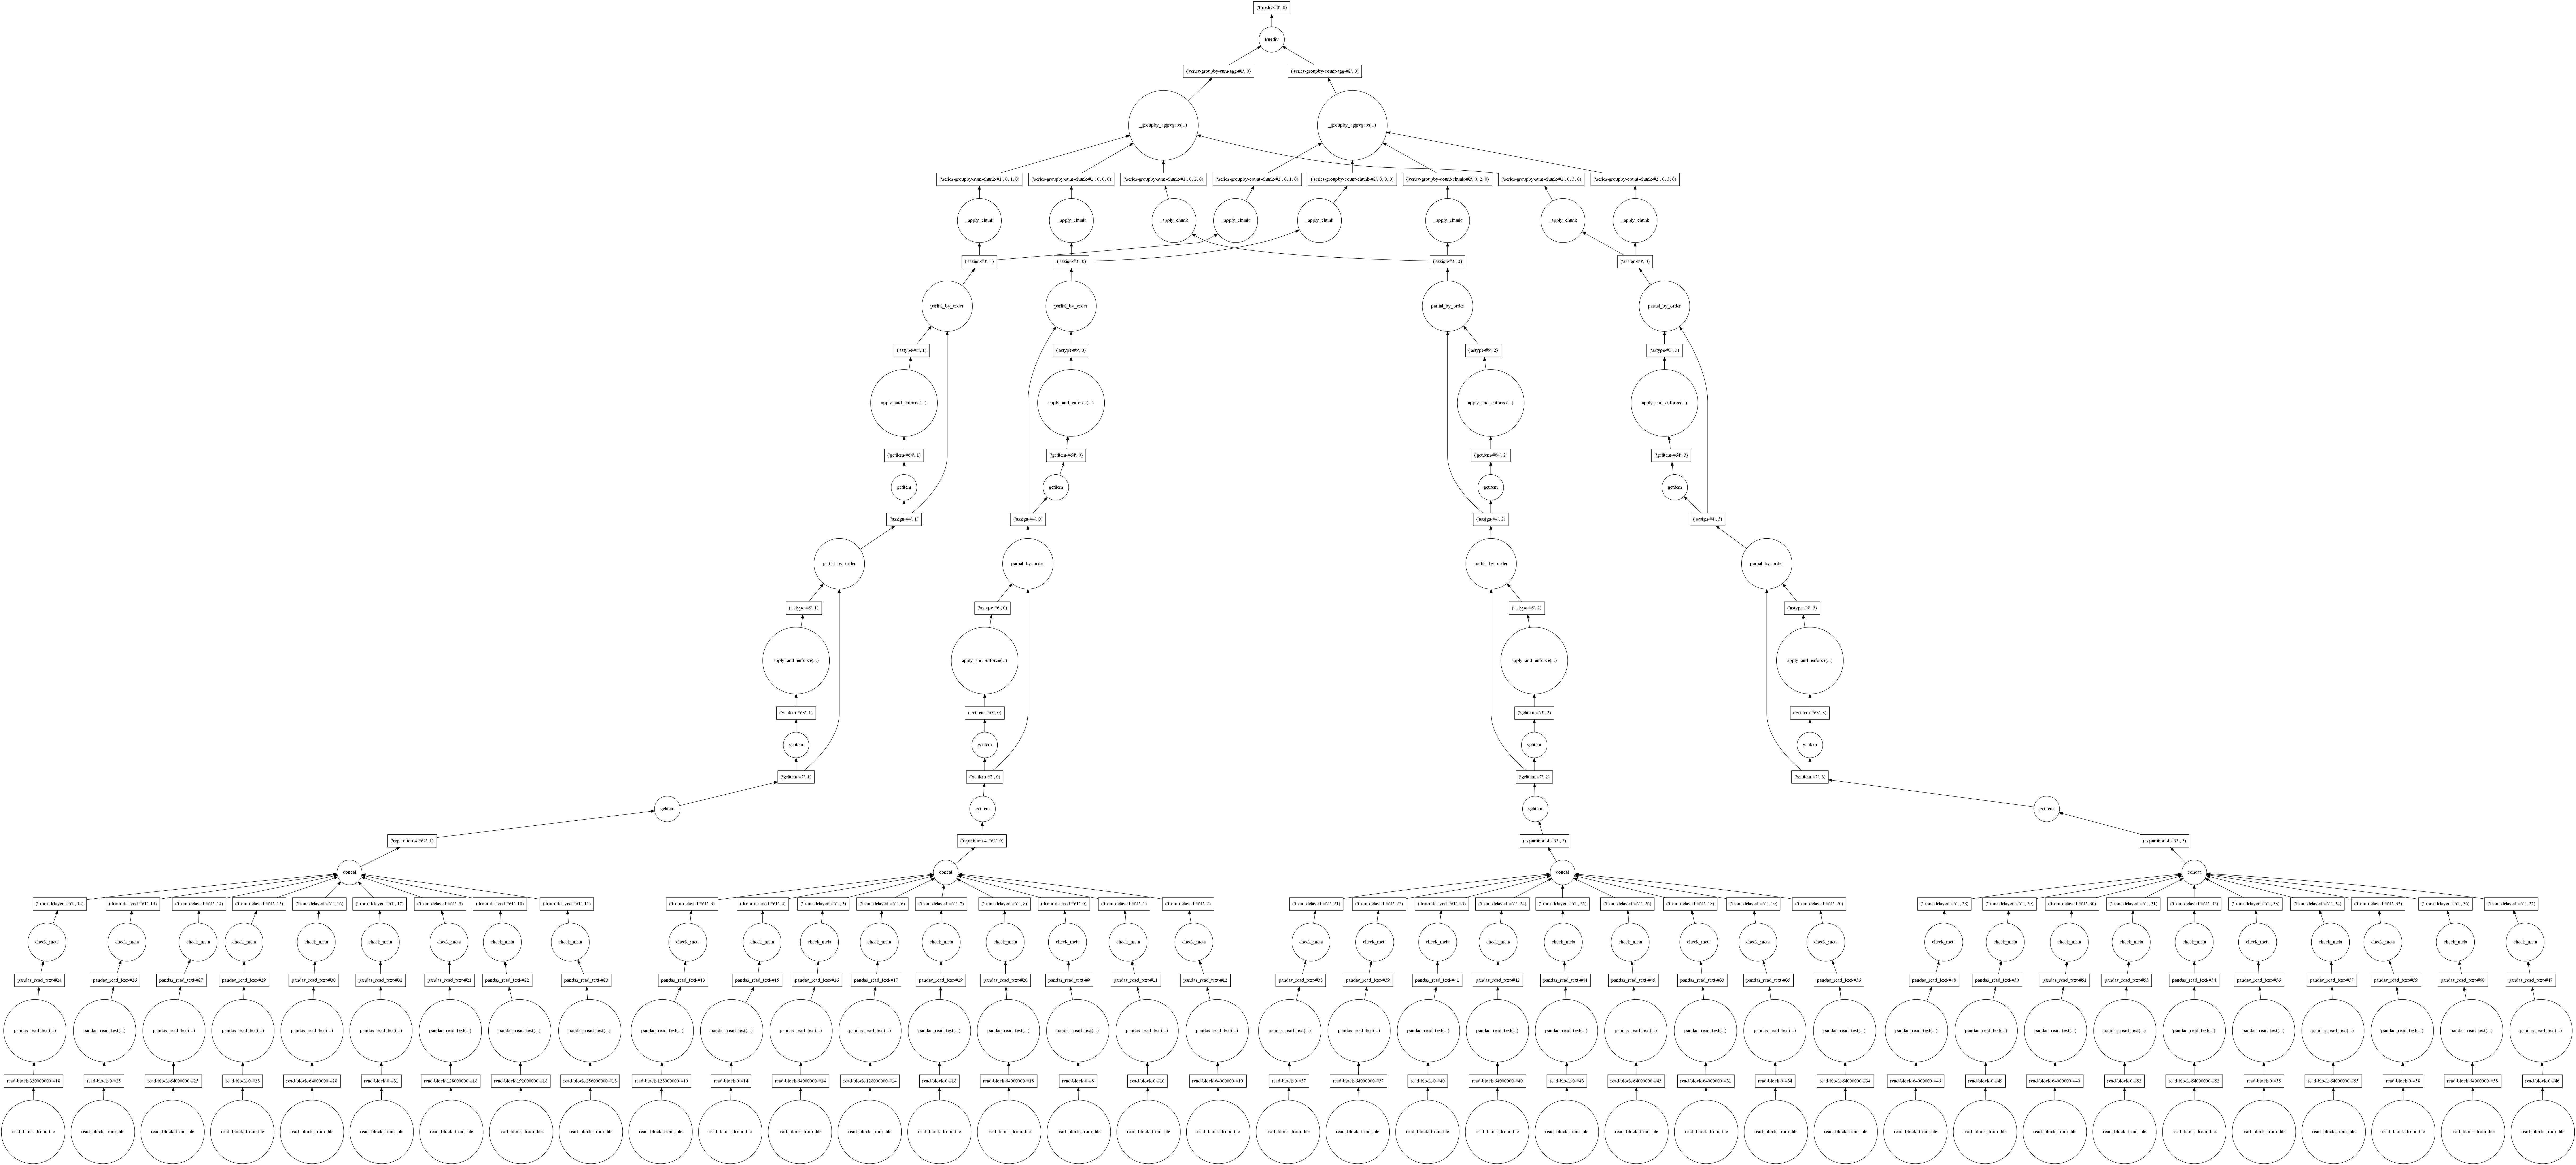

In [39]:
# visualize parallel structure
# you need to install graphviz for this, see https://graphviz.readthedocs.io/en/stable/manual.html
# df = df.repartition(npartitions=8)
import graphviz
x.visualize()

# Univariate Distributions

In [40]:
import pandas as pd
# read basic LC data again
df = pd.read_csv('../data/lendingclub/LoanStats3a.csv',skiprows = [0],low_memory=False)
# clean up interest rate as before
df['int_rate'] = df['int_rate'].str.replace('%','').astype('float')

### Histogram

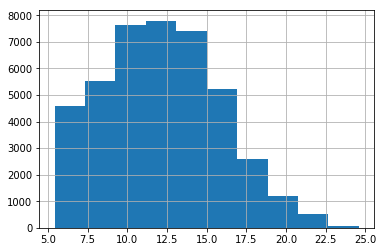

In [41]:
# key visualization tools: seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# draw histogram of interest rate
df['int_rate'].hist()

### Kernel Density

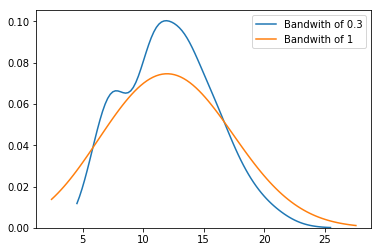

In [42]:
# draw kernel density -- choose bandwidth
sns.kdeplot(df['int_rate'].dropna(), bw=0.3, label='Bandwith of 0.3') 
sns.kdeplot(df['int_rate'].dropna(), bw=1, label='Bandwith of 1') 

### CDF

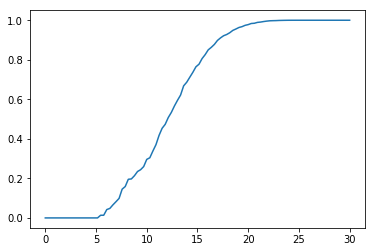

In [43]:
# plot cumulative distribution
import numpy as np

def cdf(x,grid):
    N = len(x)
    F = [float(len(x[x<=i]))/N for i in grid]
    return np.array(F)

grid = np.linspace(0,30,100)

plt.plot(grid, cdf(df['int_rate'],grid), label = 'Interest Rate')

### Box Plots

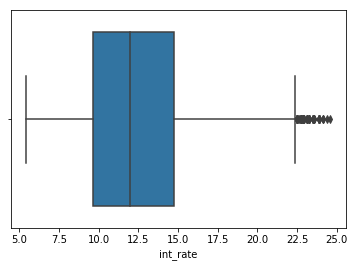

In [44]:
# box plot of interest rate
sns.boxplot(df['int_rate'])

### Word Clouds
With TF-IDF

In [45]:
# load some text data
import json
with open('../data/analysts/Clean_data_BNP PARIBAS GROUP.json') as json_file:  
    data = json.load(json_file)
df = pd.DataFrame.from_dict(data, orient= 'index')

In [46]:
df.head(5)

,Ticker,Rating,Content,Analysis,Emails,Phones
D:\ThomsonOne TXT/BNP PARIBAS GROUP\Report_BNP PARIBAS GROUP_2014-11-02_Page_1_Doc_0.txt,3383 HK,1.0,3 NOVEMBER 2014\r\n\r\nNEWS FLASH\r\n\r\nAGILE...,Successful bridge loan extension/strong suppor...,"[ronney.cheung@asia.bnpparibas.com, weeliat.le...","[+852 2825 1812, +852 2825 1105, (85) 286 178 10]"
D:\ThomsonOne TXT/BNP PARIBAS GROUP\Report_BNP PARIBAS GROUP_2014-11-02_Page_1_Doc_1.txt,ITC IN,1.0,3 NOVEMBER 2014\r\nCINHDAIAN/GFEOIONDNBUEMVEBR...,Core business top line performance in line wit...,[vijay.chugh@asia.bnpparibas.com],[+91 22 6196 4383]
D:\ThomsonOne TXT/BNP PARIBAS GROUP\Report_BNP PARIBAS GROUP_2014-11-02_Page_1_Doc_2.txt,6206 TT,1.0,3 NOVEMBER 2014\r\nTINAIIWTIAANTI/OTNECHNOL2O6...,Initiating at BUY with a TP of TWD130 Flytech ...,[charles.hsu@asia.bnpparibas.com],"[+8862 8729 7055, (20) 2012 2014, (30) 2012 20..."
D:\ThomsonOne TXT/BNP PARIBAS GROUP\Report_BNP PARIBAS GROUP_2014-11-02_Page_1_Doc_3.txt,8114 TT,1.0,3 NOVEMBER 2014\r\nTINAIIWTIAANTI/OTNECHNOL2O8...,Initiate at BUY with a target price of TWD180 ...,[charles.hsu@asia.bnpparibas.com],"[+8862 8729 7055, 140 120 100 80 60 40 20 0 (2..."
D:\ThomsonOne TXT/BNP PARIBAS GROUP\Report_BNP PARIBAS GROUP_2014-11-02_Page_1_Doc_4.txt,2883 HK,0.0,3 NOVEMBER 2014\r\nCCHHIANNAG/EENINERNGUYMSBEE...,Utilization rates under downward pressure 20% ...,"[anna.yu@asia.bnpparibas.com, yongliang.por@as...","[+852 2825 1861, +852 2825 1877]"


In [47]:
textlist = df['Analysis'].to_dict().values()

In [48]:
# turn into a TDM of bigrams
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2), max_features = 500)
X = vectorizer.fit_transform(textlist)
tdm = pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names(),index = df.index)

In [49]:
tdm.head(2)

,12 jan,12 jul,13 jan,14 jul,14 may,14 oct,14 sep,2014 16,2015 and,3m avg,...,we forecast,we see,we think,which could,which is,will be,working capital,year ending,yield cf,your salesperson
D:\ThomsonOne TXT/BNP PARIBAS GROUP\Report_BNP PARIBAS GROUP_2014-11-02_Page_1_Doc_0.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,1
D:\ThomsonOne TXT/BNP PARIBAS GROUP\Report_BNP PARIBAS GROUP_2014-11-02_Page_1_Doc_1.txt,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,4,2,1,1


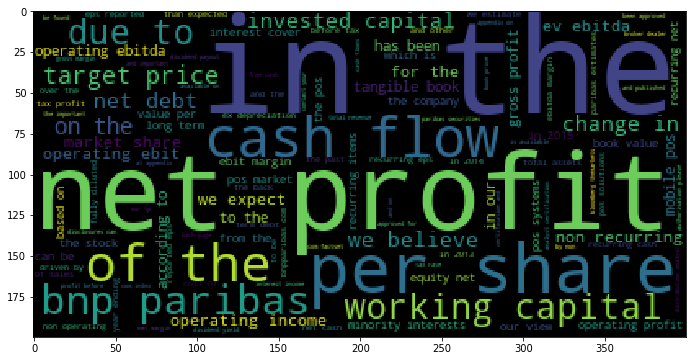

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# draw a word cloud for the mean report
avg_report = tdm.mean(axis=0).to_dict()

wc = WordCloud().generate_from_frequencies(avg_report)
plt.figure(figsize=(15,6))
plt.imshow(wc)

### Cosine Similarity
Measures the similarity between two vectors

In [51]:
# how similar are first two documents?
from sklearn.metrics.pairwise import cosine_similarity
c = cosine_similarity(tdm.iloc[0].values.reshape(1,-1),tdm.iloc[1].values.reshape(1,-1))
float(c)

0.774105094543593

# Multivariate Distributions


In [52]:
# back to lending club
df = pd.read_csv('../data/lendingclub/LoanStats3a.csv',skiprows = [0], low_memory=False)
df['int_rate'] = df['int_rate'].str.replace('%','').astype('float')

### Correlations

In [53]:
# get correlation matrix of a selection of variables
clist = ['loan_amnt', 'annual_inc', 'int_rate']
corr = df[clist].corr()
print(corr)

            loan_amnt  annual_inc  int_rate
loan_amnt    1.000000    0.276122  0.292346
annual_inc   0.276122    1.000000  0.054365
int_rate     0.292346    0.054365  1.000000


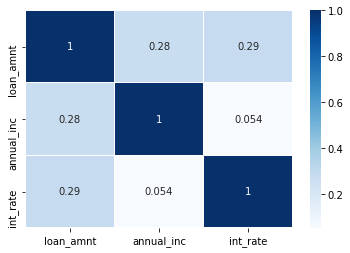

In [54]:
# visualize 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            linewidths=0.1, cmap='Blues', annot = True)

### Multivariate K density

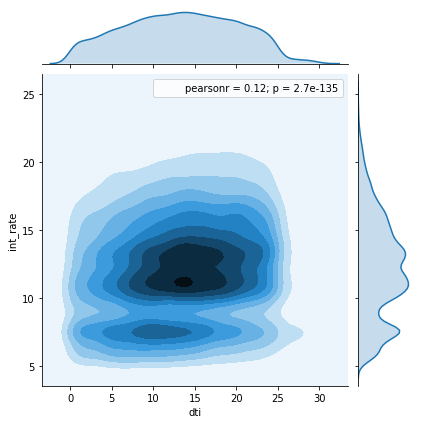

In [55]:
# kde of interest rate and dti
ax = sns.jointplot(x="dti", y="int_rate", data=df, kind="kde")

### Sorts


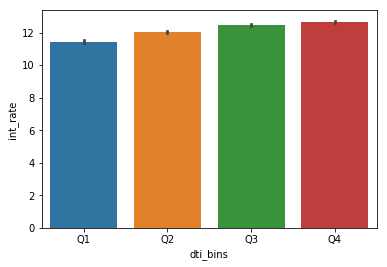

In [56]:
# cut by DTI
df['dti_bins'] = pd.qcut(df['dti'],4,labels=['Q1','Q2','Q3','Q4'])
sns.barplot(data=df,x='dti_bins',y='int_rate')

###  Double Sorts

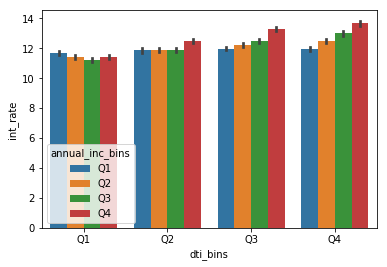

In [57]:
# cut by dti and annual income
df['dti_bins'] = pd.qcut(df['dti'],4,labels=['Q1','Q2','Q3','Q4'])
df['annual_inc_bins'] = pd.qcut(df['annual_inc'],4,labels=['Q1','Q2','Q3','Q4'])
sns.barplot(data=df,x='dti_bins',y='int_rate',hue = 'annual_inc_bins')

## Scatter

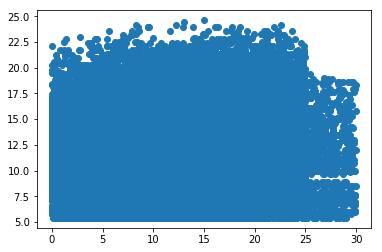

In [58]:
# often we cannot see much
plt.scatter(df['dti'],df['int_rate'])

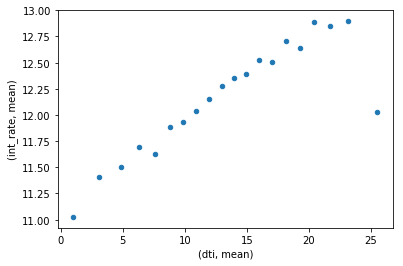

In [59]:
# bin-scatter is better with big data 
my_bins = pd.qcut(df['dti'], 20)
data = df[['dti', 'int_rate']].groupby(my_bins).agg(['mean'])
data.plot.scatter(x=('dti', 'mean'), y=('int_rate', 'mean'))